In [1]:
import sys
import os

# Changing to parent directory
parent_path = os.path.abspath(os.path.join('..'))
if parent_path not in sys.path: sys.path.append(parent_path)

os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

import data
from config import Config

config = Config()

## SHD data tests:

The directory [Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [Datasets/SHD/download].
The directory [Datasets/SHD/duration_10] already exists.
The directory [Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [Datasets/SHD/download].
The directory [Datasets/SHD/duration_10] already exists.


Shape of x is (batch_size, time_steps, in_neurons)
x shape =  torch.Size([64, 115, 700])

labels shape =  torch.Size([64])
1-hot labels shape =  torch.Size([64, 20])


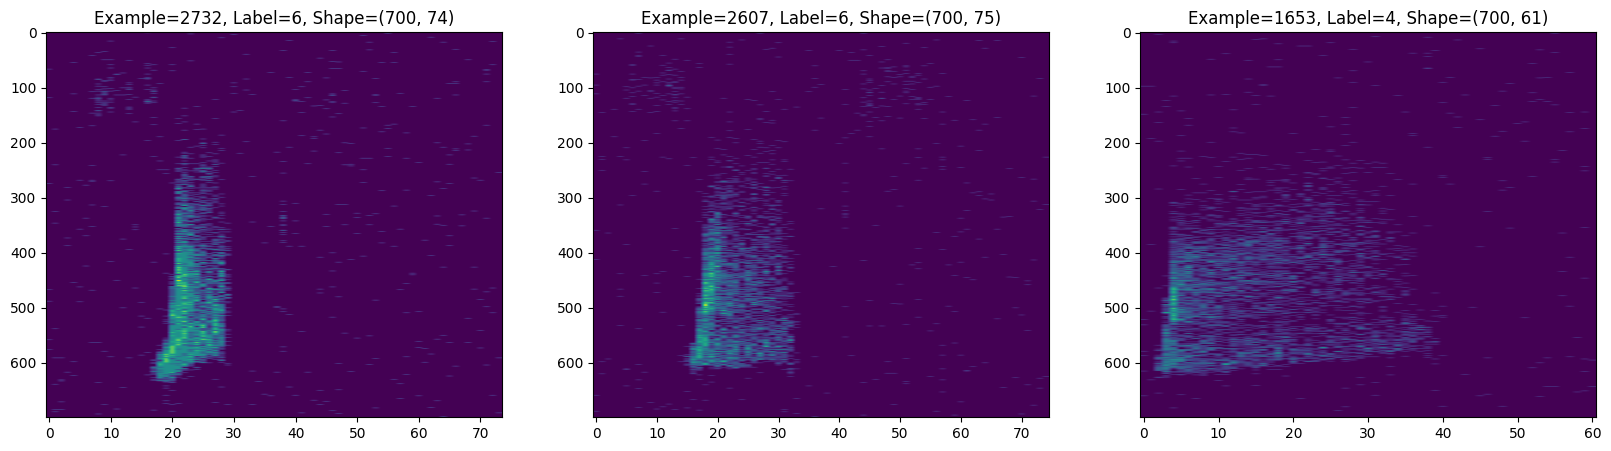

In [5]:
train_loader, valid_loader = data.SHD_dataloaders(config)

dataset = train_loader.dataset

# Generate 3 random indices
random_indices = np.random.randint(0, len(dataset), 3)

# Plot the 3 examples and their infos
plt.figure(figsize=(20,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    index = random_indices[i]
    plt.imshow(dataset[index][0].T, aspect='auto')
    plt.title(f'Example={index}, Label={dataset[index][1]}, Shape={dataset[index][0].T.shape}')

# Testing DataLoader
# _ represents the unpadded x length
for x, labels, _  in train_loader:
    print('\n\nShape of x is (batch_size, time_steps, in_neurons)')
    print('x shape = ',x.shape)
    print('\nlabels shape = ', labels.shape)
    label = F.one_hot(labels, 20).float()
    print('1-hot labels shape = ', label.shape)
    break